# **Regresión Lineal Múltiple**

### **Base de datos:** NASA.csv

1. Importa los datos del archivo “NASA.csv” a tu ambiente de trabajo. Revisa las dimensiones 
del data frame e imprime en consola tanto dichas dimensiones como las primeras 15 fila 
de datos.

In [4]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
#Importar libreria para dividir los datos en training | test
from sklearn.model_selection import train_test_split

In [5]:
#Leer CSV
df = pd.read_csv('Nasa.csv')
print('Dimensiones del Dataframe:', df.shape)
df.head(15)

Dimensiones del Dataframe: (1503, 6)


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


2. Separa el data frame en datos de entrenamiento y datos de prueba con una proporción 70/30. Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate
que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad d 
datos origina.

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
print('Dimensiones de los datos de Train:', df_train.shape, '\nDimensiones de los datos de Test:', df_test.shape)
print('Suma de los datos de Train y Test:', df_train.shape[0] + df_test.shape[0], '\nDatos totales del Dataframe:', df.shape[0])

Dimensiones de los datos de Train: (1052, 6) 
Dimensiones de los datos de Test: (451, 6)
Suma de los datos de Train y Test: 1503 
Datos totales del Dataframe: 1503


3. Entrena un modelo de regresión lineal múltiple, para que las primeras 5 variables del 
sistema intenten predecir a la sexta, “presion” Imprime en pantalla un 
resumen del modelo, donde se muestre claramente el coeficiente estimado de cad 
variable, así como su p-value asociado, entre otras cosas..

In [9]:
x = df[['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']]
y = df['presion']
#Separamos los datos en train | test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
model = sm.OLS(y_train, sm.add_constant(x_train))
results = model.fit()
print(results.summary())
print('\nP-values:\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     218.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          7.42e-160
Time:                        15:27:59   Log-Likelihood:                -3149.9
No. Observations:                1052   AIC:                             6312.
Df Residuals:                    1046   BIC:                             6342.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7685      0.648    204.763      0.0

4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos 
una variable significativa en el modelo. Adicionalmente  indica específicamente cuá   
cuáles variables específicas tienen una asociación lineal significativa con la salida y cu l
considerarías que es la variable más importante del modelo. Imprime en consola c una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás 
basando para llegar a cada conclusión.ada

In [11]:
print('Considero que existe al menos una variable significativa en el modelo, específicamente considero que frecuencia debería ser una variable con una asociación lineal significativa, ya que su p-value es el más pequeño de todos las variables. De la misma forma considero que la variable longitud puede tener una asociación lineal significativa siendo la variable con el segundo menor p-value de todas. En cuanto a las demas, su p-value ronda aproximadamente por los mismos valores entre 25 y 20, lo cual podría indicar que solo una de ellas es significativa.')

Considero que existe al menos una variable significativa en el modelo, específicamente considero que frecuencia debería ser una variable con una asociación lineal significativa, ya que su p-value es el más pequeño de todos las variables. De la misma forma considero que la variable longitud puede tener una asociación lineal significativa siendo la variable con el segundo menor p-value de todas. En cuanto a las demas, su p-value ronda aproximadamente por los mismos valores entre 25 y 20, lo cual podría indicar que solo una de ellas es significativa.


5. Calcula el residual standard error y la R^22 del modelo, tanto para los datos d 
entrenamiento como para los datos de validación e imprime dichos valores en la consol .
Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar  os
atributos ‘scale’ (y sacar la raíz cuadrada) y ‘rsquared’.

In [13]:
yPredTest = results.predict(sm.add_constant(x_test))
yPromTest = np.mean(y_test)
RSSTest = sum((y_test - yPredTest)**2)
yPredTrain = results.predict(sm.add_constant(x_train))
yPromTrain = np.mean(y_train)
RSSTrain = sum((y_train - yPredTrain)**2)
#Calcular RSE
RSETest = np.sqrt(RSSTest/(len(x)-2))
RSETrain = np.sqrt(RSSTrain/(len(x)-2))
print('RSE de Train = ', RSETrain)
print('RSE de Test = ', RSETest)
#Calcular R^2 con TSS
TSSTest = sum((y_test - yPromTest)**2)
R2Test = (TSSTest - RSSTest)/TSSTest
TSSTrain = sum((y_train - yPromTrain)**2)
R2Train = (TSSTrain - RSSTrain)/TSSTrain
print('R^2 de Train = ', R2Train)
print('R^2 de Test = ', R2Test)

RSE de Train =  4.045347902935131
RSE de Test =  2.5940756488427392
R^2 de Train =  0.5113402222530259
R^2 de Test =  0.5236569764931662


6. Finalmente, tratemos de visualizar los resultados obtenidos. Genera una gráfica de 
dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de dato 
de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al model ,
para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se
tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor
estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nu stro
modelo, entre más se asemejen los puntos a una línea  ecta, mejor. Comenta sob e los
resultados obtenidos.nidos.

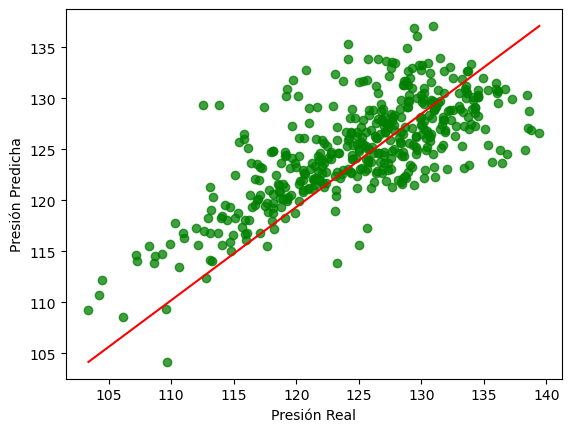

In [24]:
xgraph = y_test
ygraph = yPredTest
plt.scatter(xgraph, ygraph, color='g', alpha=0.75)
plt.xlabel('Presión Real')
plt.ylabel('Presión Predicha')
plt.plot([min(xgraph), max(xgraph)], [min(ygraph), max(ygraph)], color='red')
plt.show()

Se puede observar por esta gráfica que la linea parece tener una pendiente de 45°, lo cuál es positivo, ya que esto prueba que el modelo está muy cerca de ser perfecto para el conjunto de datos de válidación, siendo que el valor estimado y el valor real son casi identicos.

### *"Doy mi palabra de que he realizado esta actividad con integridad académica."*